# Stochastic Gradient Descent on Linear Regression

Imagine going to the gym only to realize when you arrive that it's so crowded that you have to wait to use the machines you want.

Let's build a model that will help predict the best time to go to the gym and avoid crowds. We can leverage the "Crowdedness at the Campus Gym" dataset to help us do just that. The dataset contains historic information about how crowded the campus gym is on a given day and hour.

In [1]:
#importing necessaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
#from scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Exploring the Dataset

To get a better grasp on the data we plan on extrapolating insights from, let's review what exactly the dataset entails. 

In [2]:
#loading the dataset
df = pd.read_csv('crowdness_gym_data.csv')
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
#checking for null values
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [5]:
#basic statistics about the data
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000



- The dataset contains 62,184 observations and 11 columns. Those columns and their data types:
    1. number_people
        - integer
    2. date
        - object
    3. timestamp
        - integer
    4. day_of_week
        - integer
    5. is_weekend
        - integer
    6. is_holiday
        - integer
    7. temperature
        - float
    8. is_start_of_semester
        - integer
    9. is_during_semester
        - integer
    10. month
        - integer
    11. hour
        - integer
No empty null values


### Cleaning Up

The `date` column is a bit cumbersome to clean, let alone utilize in futher analysis. It's best to rely on `timestamp` to assess dates and time.

In [6]:
df = df.drop(['date'], axis=1)
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


### Exploratory Data Analysis

Starting by doing Univariate Analysis on some of the features, we'll be taking a deeper look at the distributions of specific features.

I will plot histograms for the month, day and hour, since they probably have the largest influence on the ammount of people.

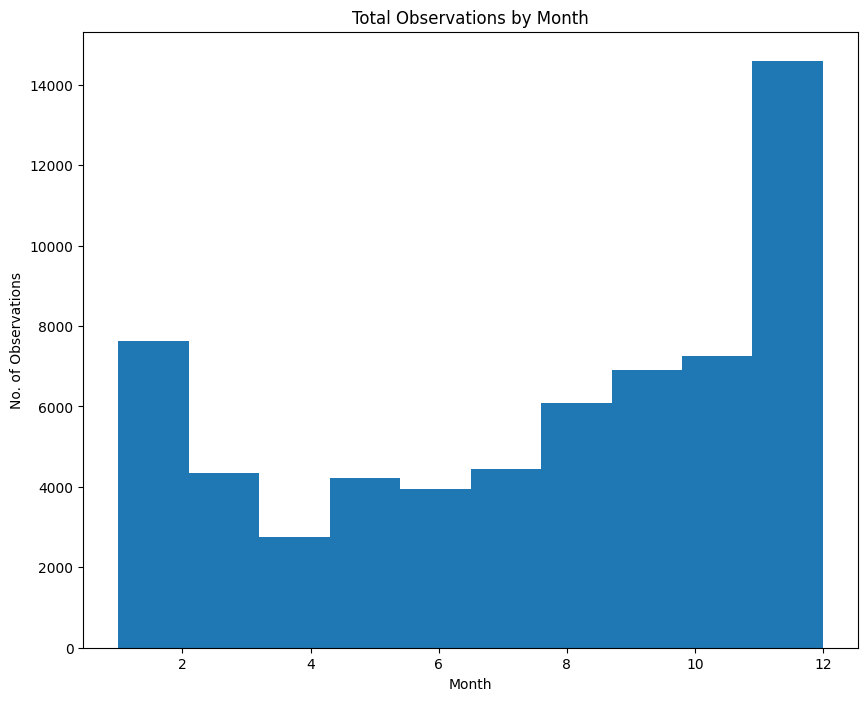

In [7]:
#histograms for the month, day and hour
#histogram: month
plt.figure(figsize=(10, 8))
plt.hist(df['month'])
plt.title('Total Observations by Month')
plt.xlabel('Month')
plt.ylabel('No. of Observations')
plt.show()

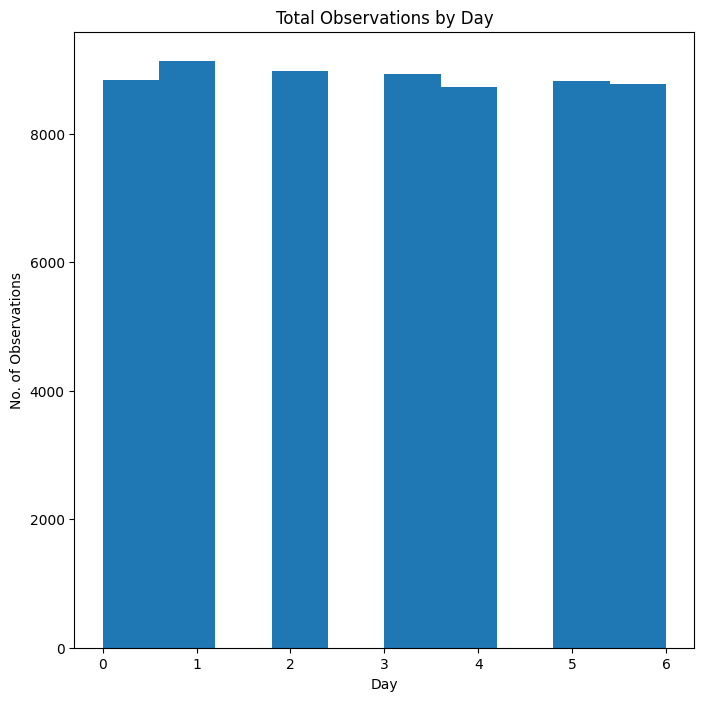

In [8]:
#histograms for the month, day and hour
#histogram: month
plt.figure(figsize=(8, 8))
plt.hist(df['day_of_week'])
plt.title('Total Observations by Day')
plt.xlabel('Day')
plt.ylabel('No. of Observations')
plt.show()

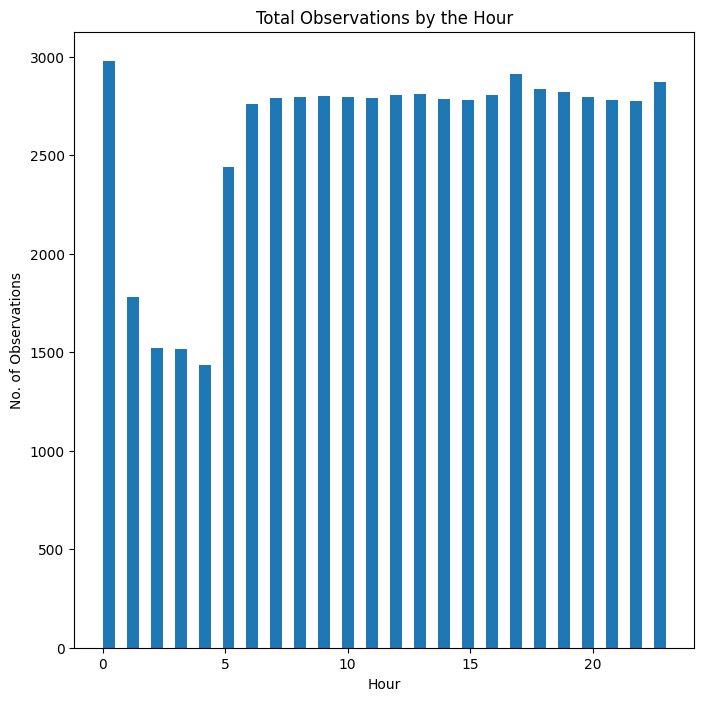

In [13]:
#histograms for the month, day and hour
#histogram: month
plt.figure(figsize=(8, 8))
plt.hist(df['hour'], bins=47)
plt.title('Total Observations by the Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Observations')
plt.show()

Seems that the biggest lulls in terms of people in the gym are between the hours of 1 AM to 4 AM. Not ideal if you aren't one that prefers to workout in the middle of the night.

[ 0  0  0 ... 23 23 23]


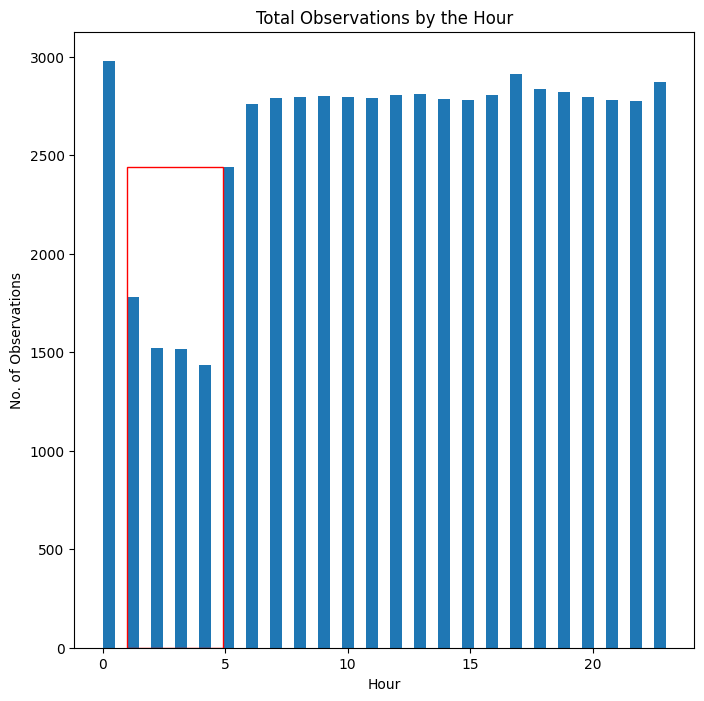

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Sort your data
sorted_data = np.sort(df['hour'])
print(sorted_data)

# Get the 2nd and 6th observations
second_observation = 1
sixth_observation = 5

plt.figure(figsize=(8, 8))

# Create the histogram and get the bin information
counts, bins, bars = plt.hist(df['hour'], bins=47)

# Find the bins of the 2nd and 6th observations
second_bin = np.digitize(second_observation, bins) - 1
sixth_bin = np.digitize(sixth_observation, bins) - 1

# Create a rectangle patch that spans from the 2nd to the 6th observation
rect = patches.Rectangle((bins[second_bin], 0), bins[sixth_bin]-bins[second_bin], max(counts[second_bin:sixth_bin+1]), linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the plot
plt.gca().add_patch(rect)

plt.title('Total Observations by the Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Observations')
plt.show()


Seeing that we're building a model to predict the ammount of people (target variable) present at the gym any given point, we could stand to benefit by utilzing Bivariate Analysis, meaning we confront two variables at the same time to see if there is any correlation between them.

Let's plot the relations between month, day and hour compared to the number of people.

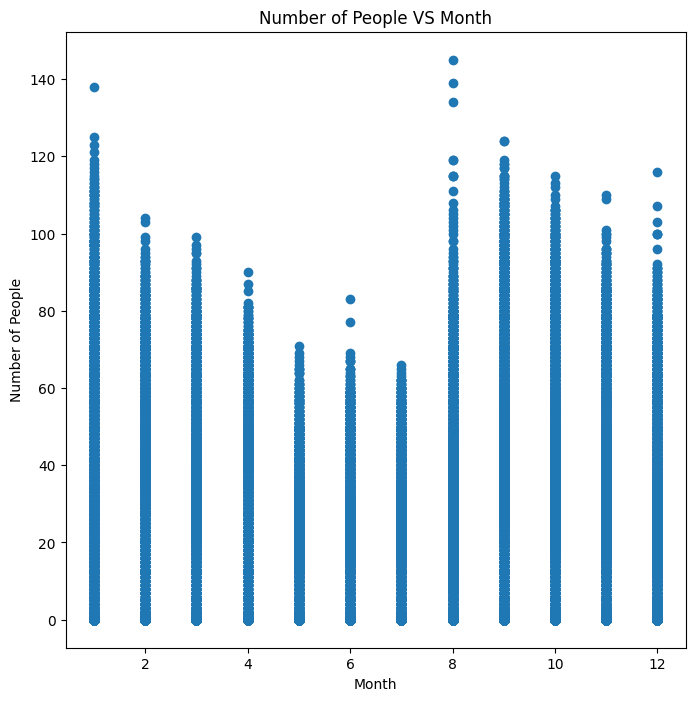

In [53]:
plt.figure(figsize=(8, 8))

plt.scatter(df['month'], df['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()

As evidenced above, the busiest times of the year correspond with the beginnings of semesters (January, and August-October).

As the school year winds down, traffic in the spring semester consistently decreases month after month. 

As a matter of fact, by changing the order of months, you can clearly see that this declines can be oberserved from the start of the school year in August, through the end of the school year in May (save the jump in January) and up to end of the summer break in July. 

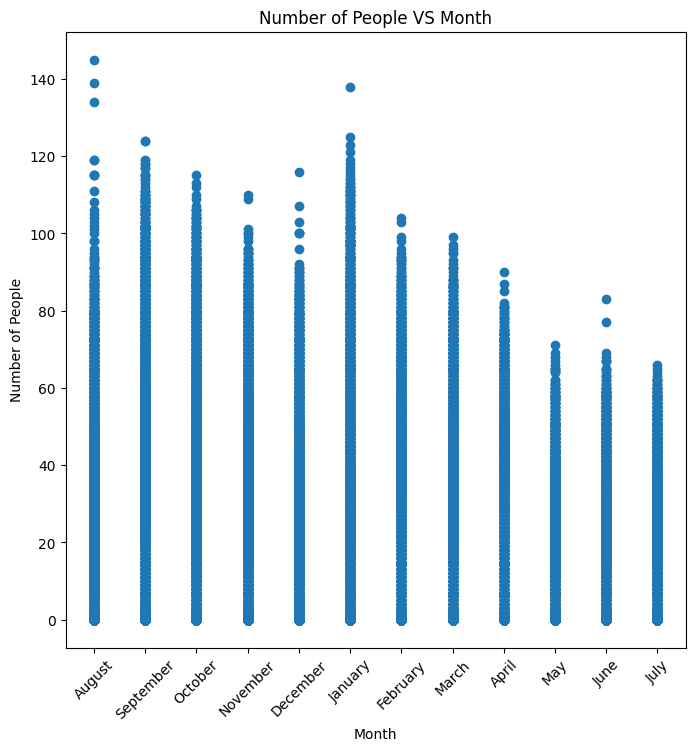

In [63]:
df_copy = df.copy()
plt.figure(figsize=(8, 8))

# Define a dictionary mapping integers to month names
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace the values in the column
df_copy['month'] = df_copy['month'].replace(month_dict)
plt.scatter(df_copy['month'], df_copy['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()

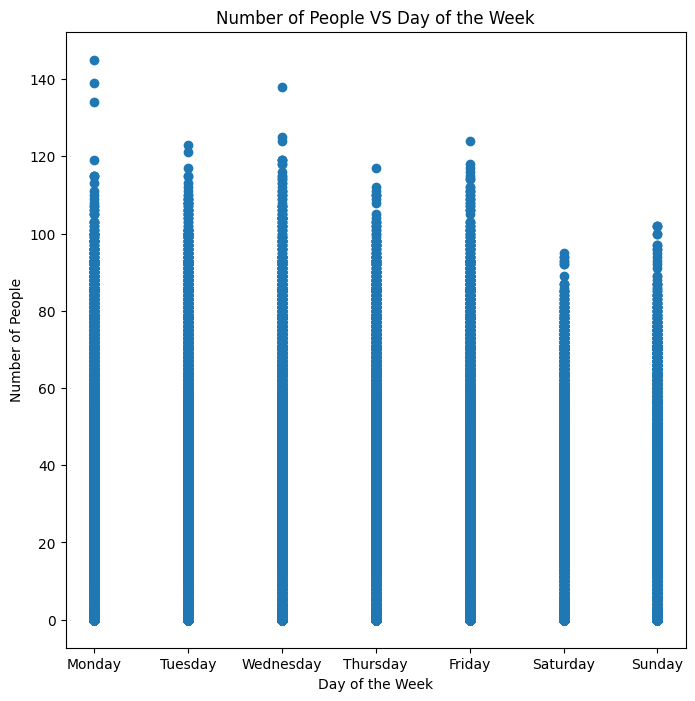

In [65]:
plt.figure(figsize=(8, 8))

plt.scatter(df['day_of_week'], df['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Number of People')
plt.show()

As far as days of the week are concerned, the busiest are Monday and Wednesday. The weekend is when traffic is the lowest.

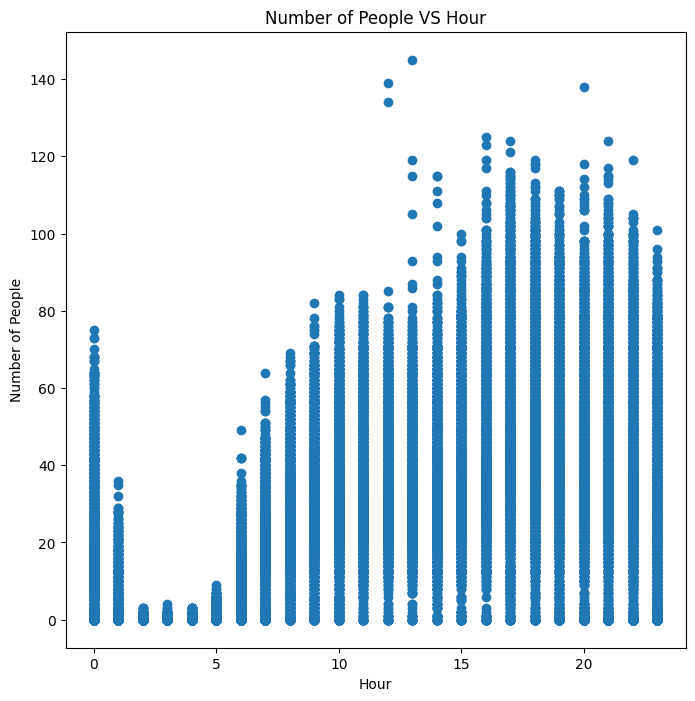

In [64]:
plt.figure(figsize=(8, 8))

plt.scatter(df['hour'], df['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

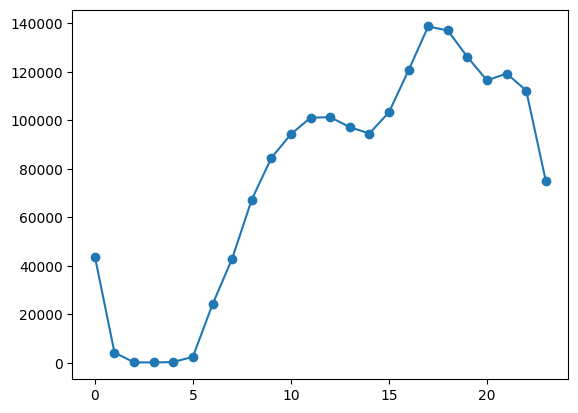

In [90]:
df_grouped = df.groupby('hour', as_index=False).sum()
plt.plot(df_grouped['hour'], df_grouped['number_people'], marker='o')
plt.show()

There's a few things that can be inferred in the above hourly scatter plot:
1. The biggest lull is between the hours of 1 AM to 5 AM
2. There's a large jump from 5 AM to 6 AM (nearly 5x as many people!)
3. This increasing trend continues until around noon and holds steady until 3 PM where traffic picks up again
4. Traffic peaks at 5 PM and tapers off into midnight

### Correlations

Let's see what correlations can be observed.

In [95]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [94]:
df.corr()['number_people']

number_people           1.000000
timestamp               0.550218
day_of_week            -0.162062
is_weekend             -0.173958
is_holiday             -0.048249
temperature             0.373327
is_start_of_semester    0.182683
is_during_semester      0.335350
month                  -0.097854
hour                    0.552049
Name: number_people, dtype: float64

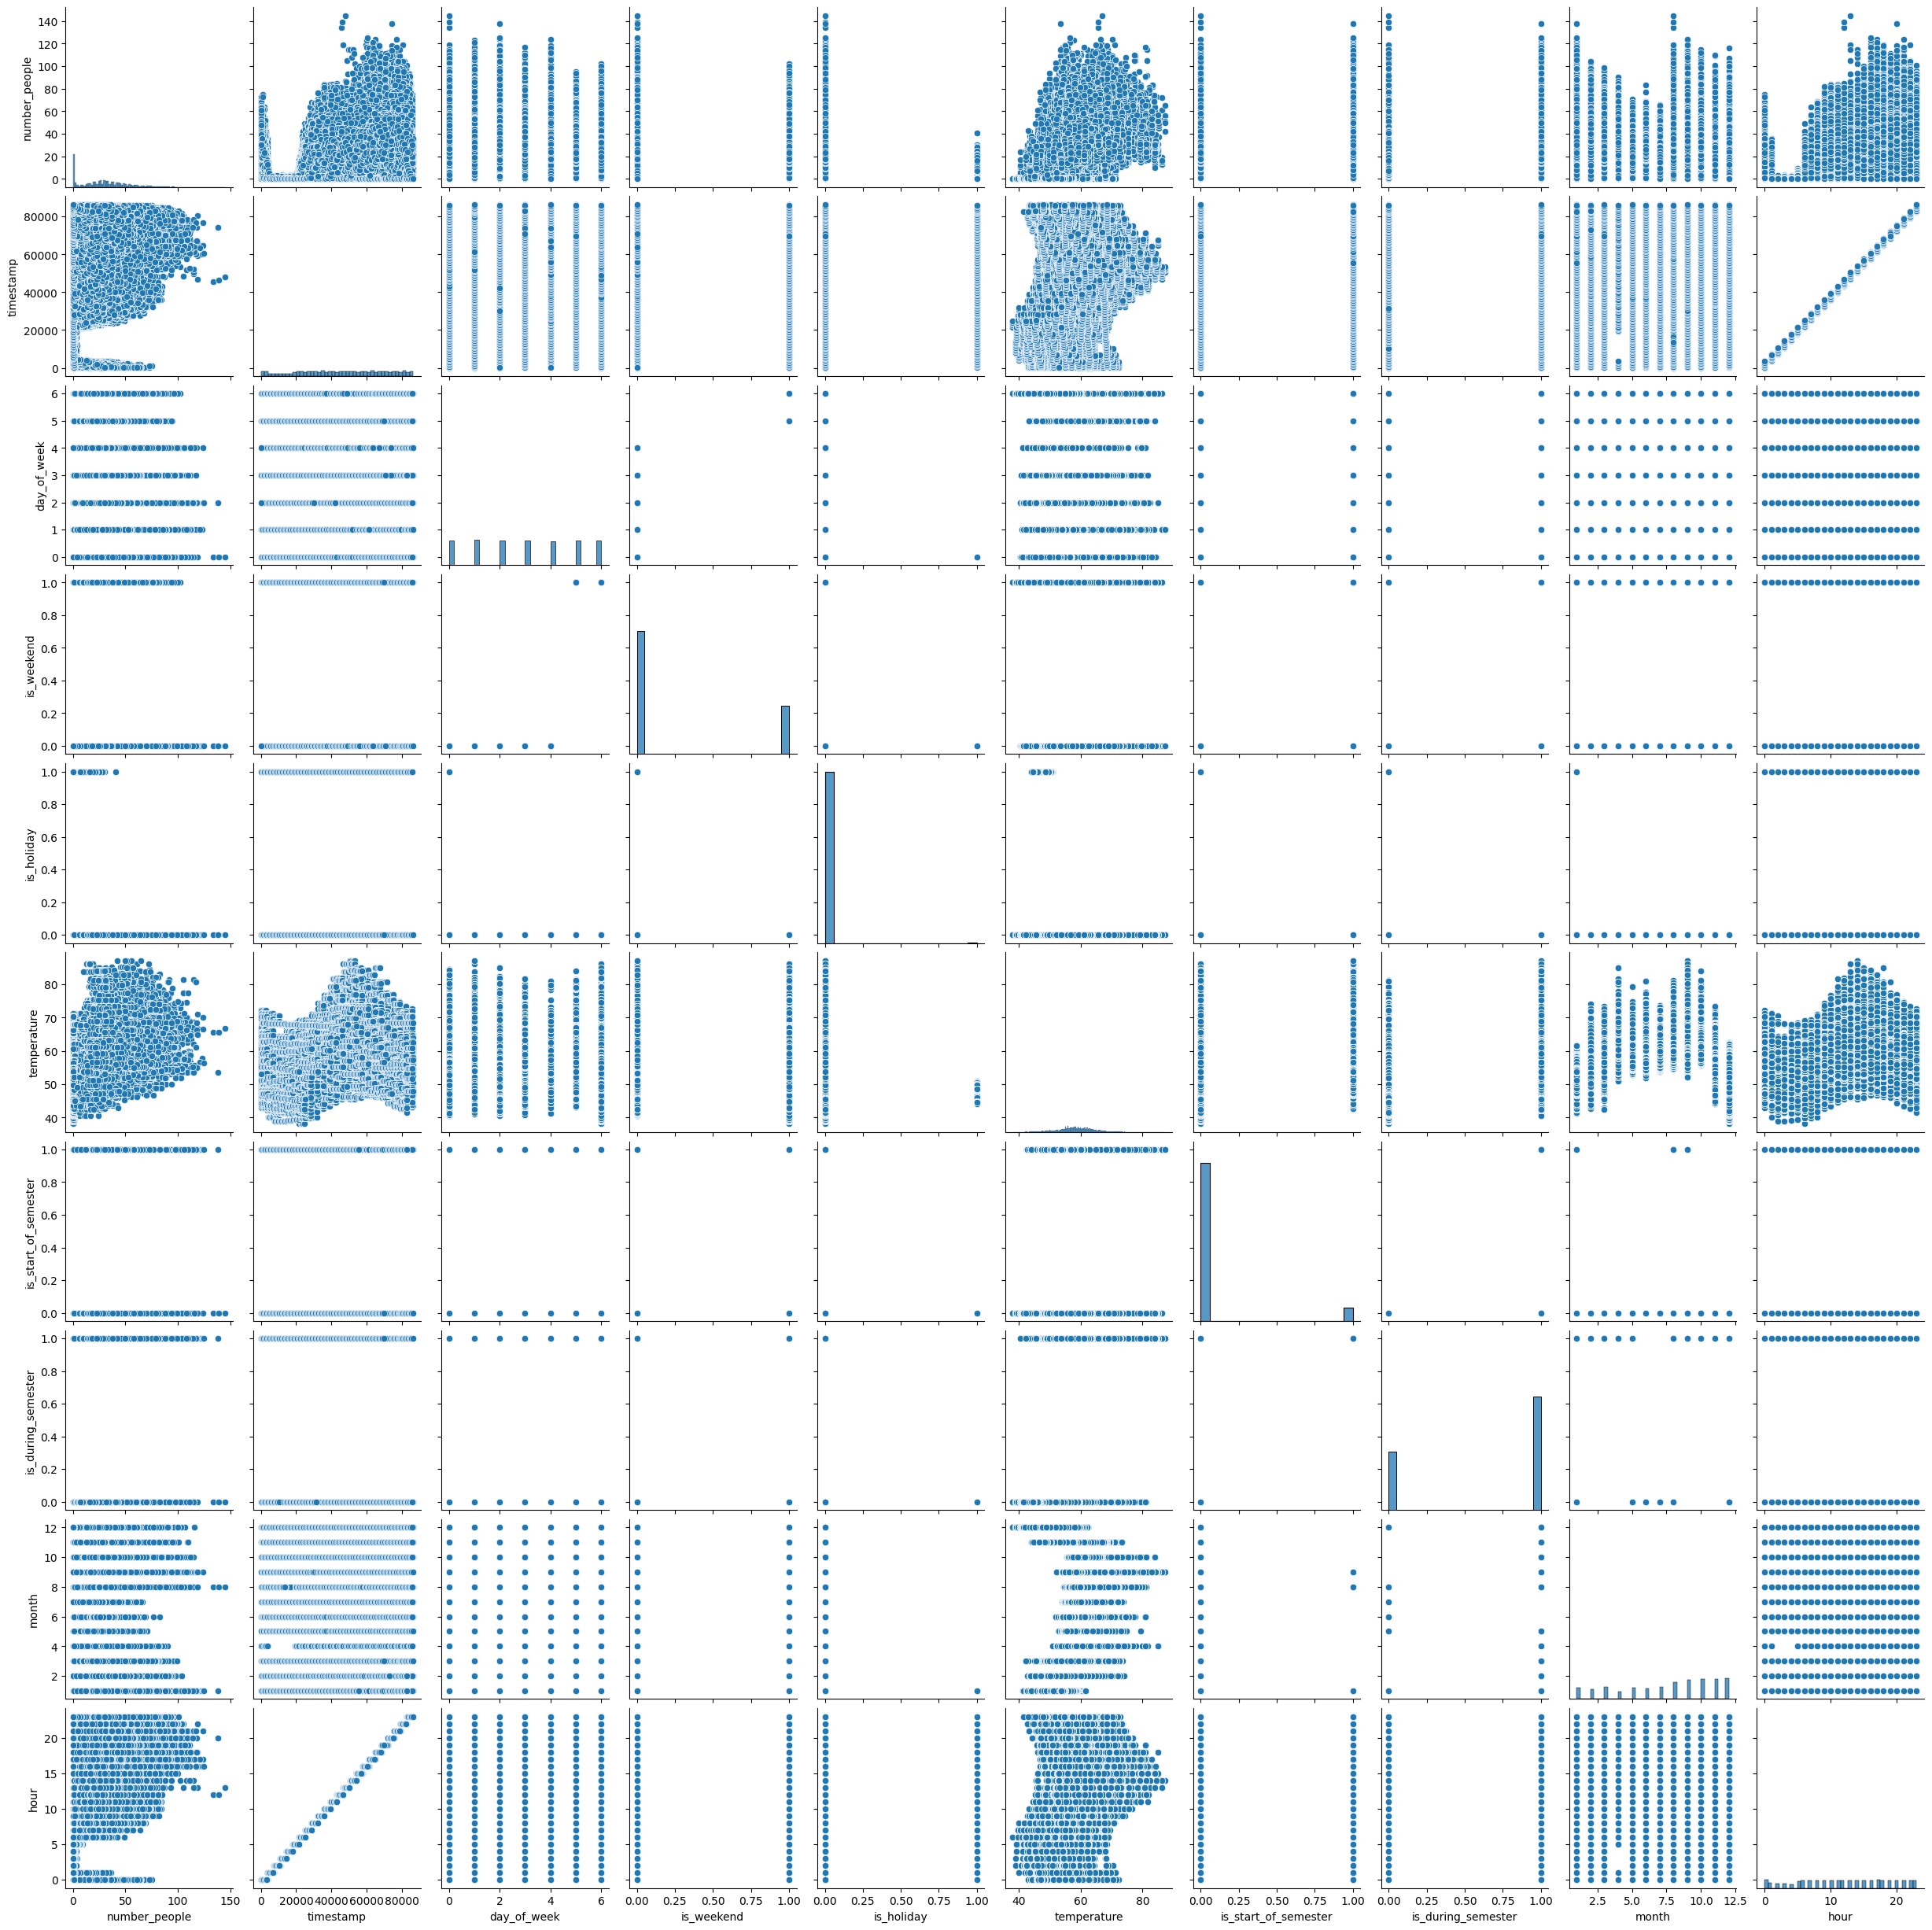

In [92]:
sns.pairplot(df)

<AxesSubplot:>

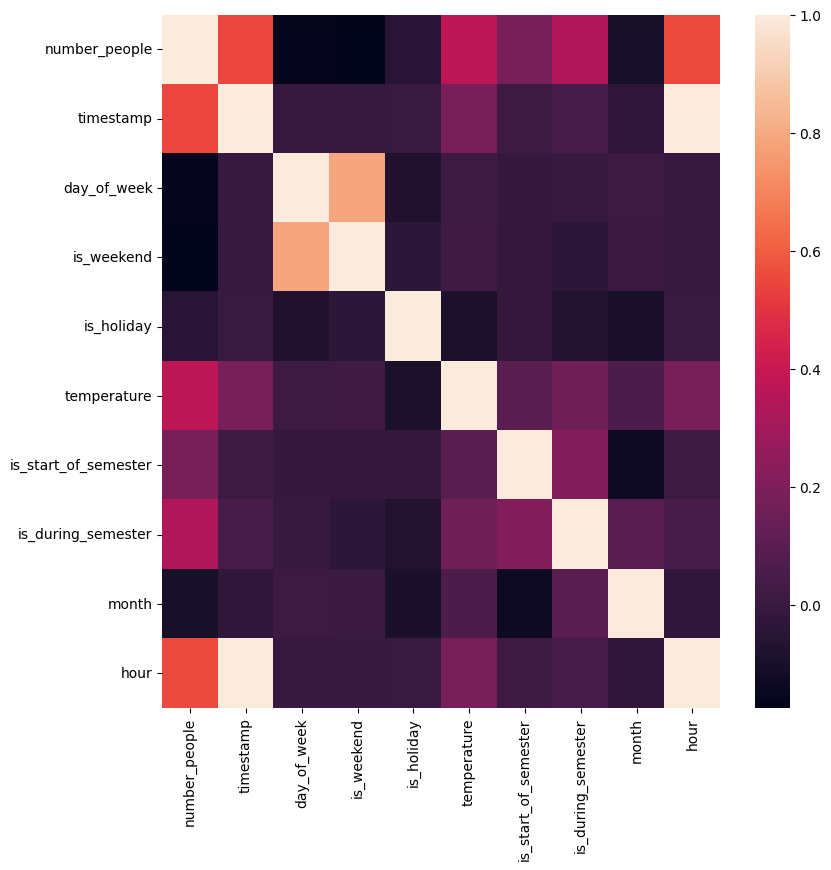

In [93]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr())

This seems to confirm what might be the features worth focusing on in our analysis:
1. `hour`
2. `temperature`
3. `is_during_semester`

`timestamp` and `hour` are obviously highly correlated. Seeing that we can better work with and understand the `hour` variable, we'll drop `timestamp` from the dataset. 

In [96]:
df = df.drop('timestamp', axis=1)
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


## Preparing the Model

Now we have a clean dataset, and we we have analyzed it and removed any variables that we don't consider important — or that they contain too much noise for our model. The next step is to prepare our data for modeling.

### Splitting the Dataset
We'll split the data into train and test sets. Test size of 20% (80% of the data for training and 20% for testing). I am also setting the random state, so as to be able to replicate in the future.

In [99]:
X = df.drop('number_people', axis=1)
y = df['number_people']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=417)

In [100]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)
sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

### Measuring Model Perfomance

In [107]:
y_pred_v1 = sgd_v1.predict(X_test)
mse_v1 = mean_squared_error(y_test, y_pred_v1)
r2_v1 = r2_score(y_test, y_pred_v1)
mae_v1 = mean_absolute_error(y_test, y_pred_v1)

print(f'Mean Squared Error: {mse_v1:0.6}')
print(f'R2 Score: {r2_v1:0.4}')
print(f'Mean Absolute Error: {mae_v1:0.5}')

Mean Squared Error: 260.711
R2 Score: 0.493
Mean Absolute Error: 12.152


The above doesn' instill a lot of confidence in this model. The mean squared error is too high (the closer to zero this metric is, the higher the model's performance).

The R2 is on the wrong side of 50%.

Let's see if properly scaling our dataset changes these metrics in any meaningful way.

### Scaling

In [108]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
sgd_v2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)
sgd_v2.fit(X_train_scaled, y_train)
y_pred_v2 = sgd_v2.predict(X_test_scaled)#predicting labels

In [111]:
mse_v2 = mean_squared_error(y_test, y_pred_v2)
r2_v2 = r2_score(y_test, y_pred_v2)
mae_v2 = mean_absolute_error(y_test, y_pred_v2)

print(f'Mean Squared Error: {mse_v2:0.6}')
print(f'R2 Score: {r2_v2:0.4}')
print(f'Mean Absolute Error: {mae_v2:0.5}')

Mean Squared Error: 257.739
R2 Score: 0.4987
Mean Absolute Error: 12.13


The model performs better with the data scaled, but really not much over all. 

## Visualizing the Results
To see how our model performs, the best way is to visualize it. Here is the plot from our first model, using line plots with the actual test data on the back and the predicted data on the front. The parts where the plots converge are the points where the model performed well, and the divergence in the plots is where the model performed poorly.

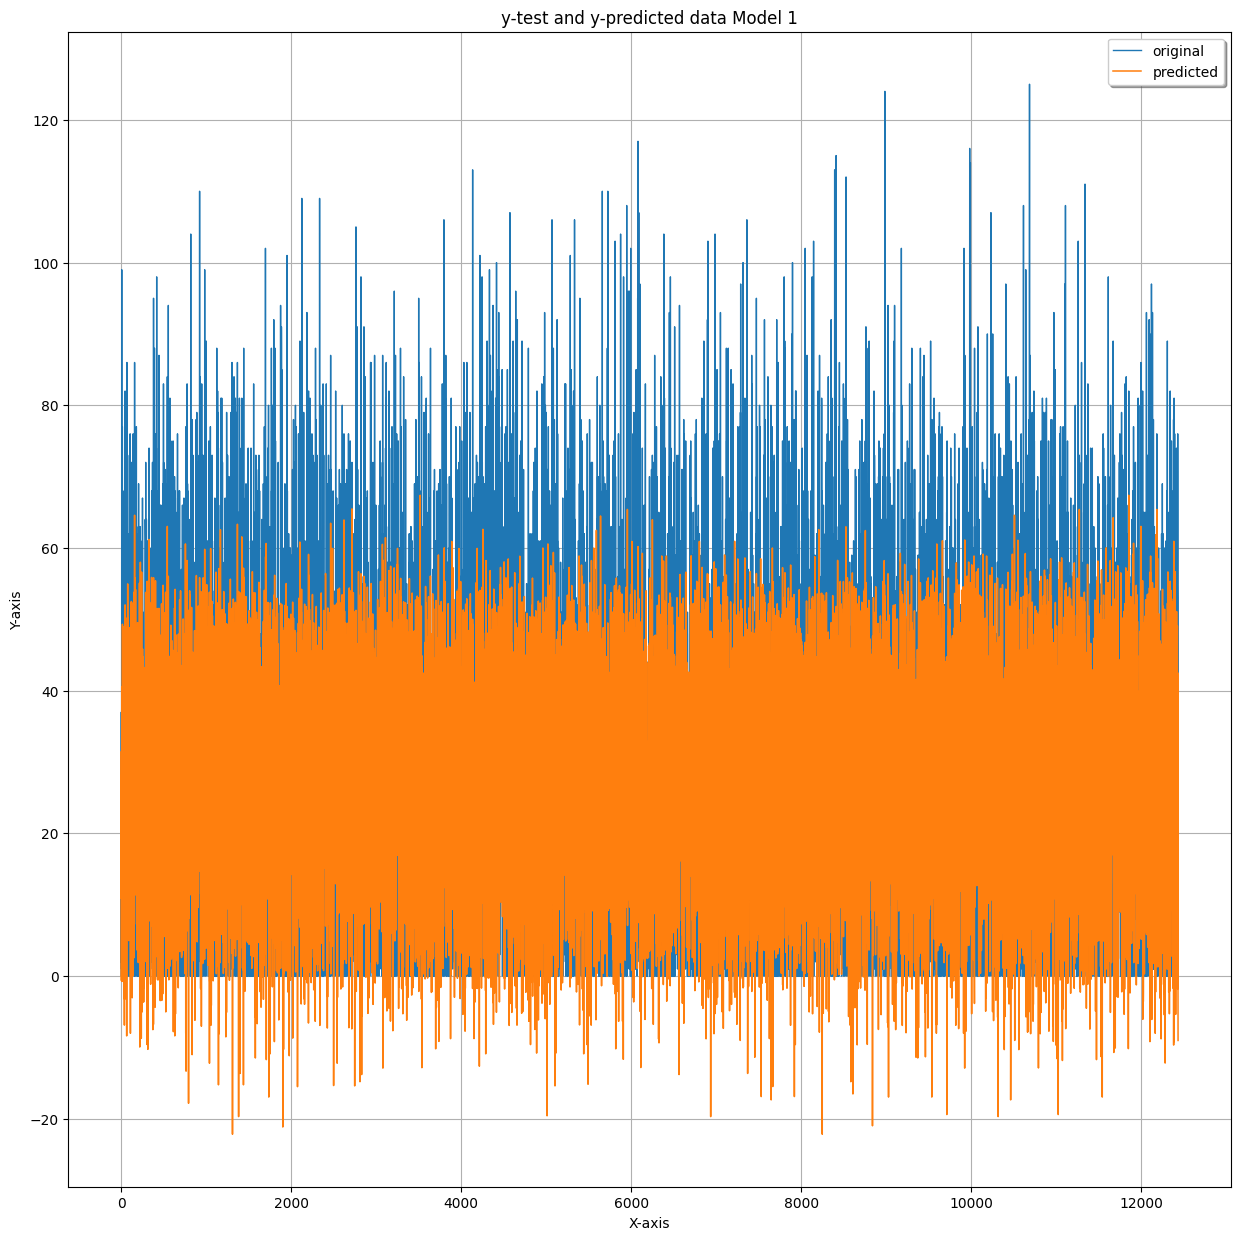

In [112]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v1, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

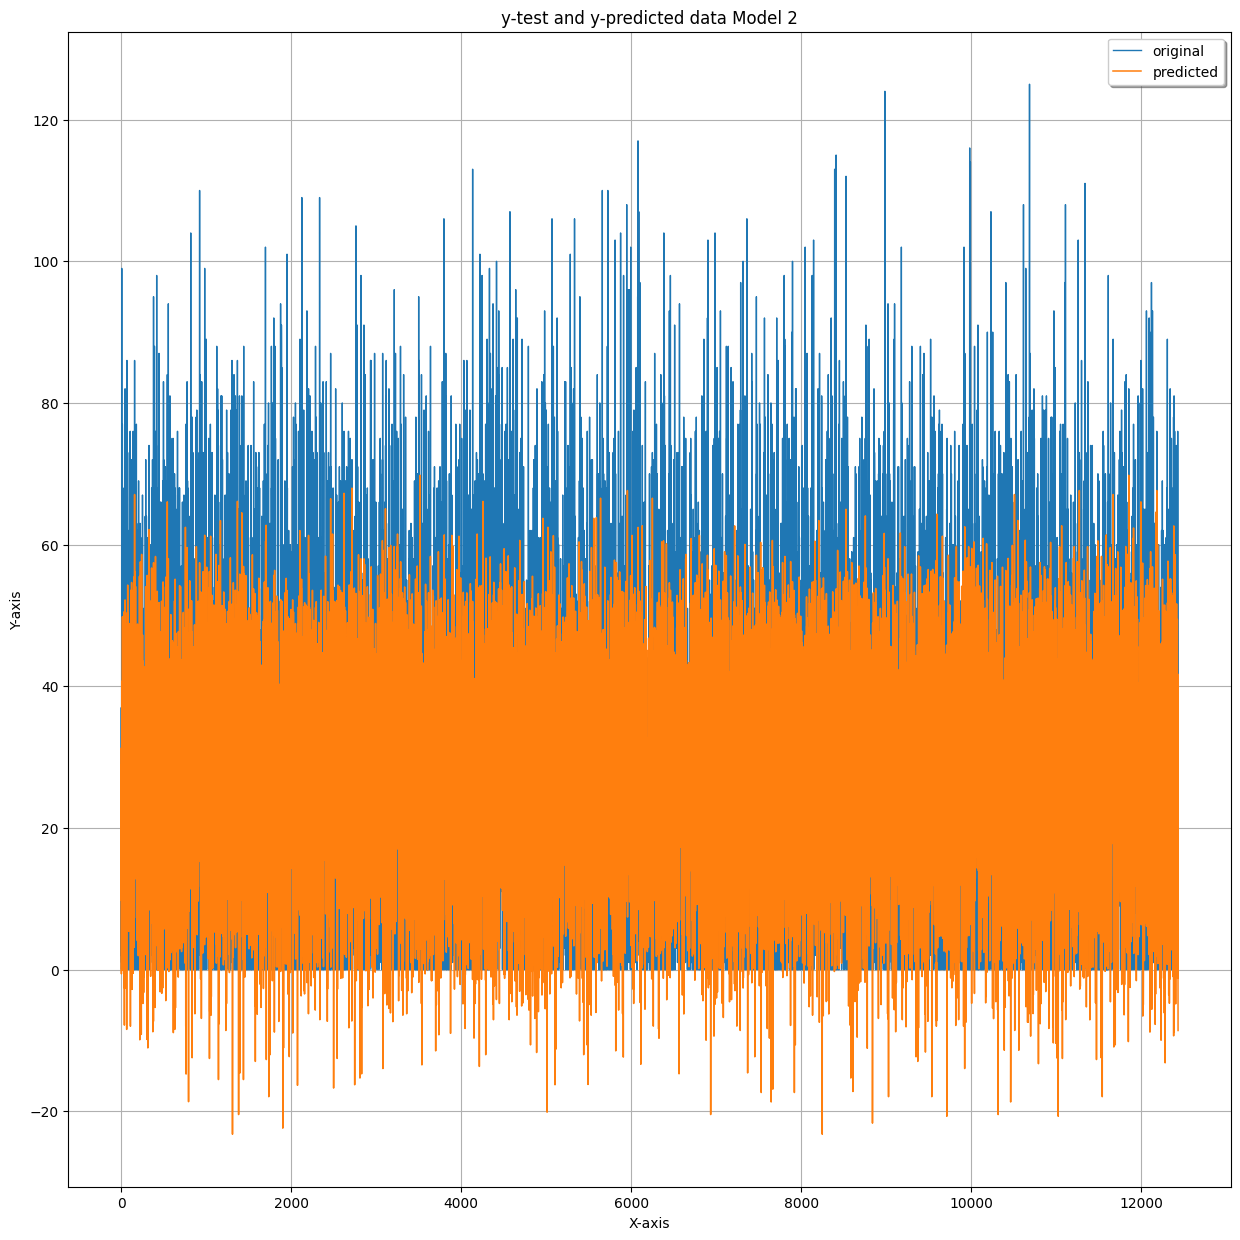

In [114]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# Summary
Though there's a lot of room for improvement, developing a regression model using Stochastic Gradient Descent is a good place to start as any in building such a prediction model.

Changes in our approach worth considering; 
- Removing the timestamp variable was done to avoid adding redundancy and reduce "noise" in our model, but it might be that this variable could ultimately prove helpful in improving the model's over perfomance.
- There's always the option of changing hyperparameters might be interesting, especially changing the loss function from huber to squared_epsilon_insensitive and maybe exploring changing the learning rate and penalty.

In general, from the data and the model, for someone like me who likes to go to the gym often without having too many people there, any day at 5am seems like a safe bet.